# Precipitation and Deforestation Plotting and Dataframes

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Dependencies
import requests
from pprint import pprint
import numpy as np
import gmaps
import json
import os
from scipy.stats import linregress
from datetime import datetime
import time

# Google developer API key
#from config import g_key

## Pulling Data

In [18]:
#pulls data from useable/cleaned dataframes of total_rainfall and deforestation data
tot_rainfall_df=pd.read_csv('useable_csv/total_rainfall_by_year_by_state.csv')
deforest_per_year=pd.read_csv("useable_csv/deforestation_per_year_data.csv")

deforest_per_year=deforest_per_year.rename(columns={"Grand Total": "Total_Deforested_km2"})

tot_rain=tot_rainfall_df.drop(["Unnamed: 0"], axis =1)

## Pivot Table

In [19]:
#creates a pivot table of precipitation data in order to generate new dataframes for creating plots
tot_rain_pvt=tot_rain.pivot_table(values="Precipitation", index="Year", columns="State")
tot_rain_pvt=tot_rain_pvt.fillna(0)
tot_rain_pvt.head()

State,AC,AM,AP,MA,MT,PA,RR,TO
Year,,,,,,,,
1988,1805.700000,2763.875000,2591.0,1876.308333,1397.666667,2588.020000,507.5,1727.300
1989,2345.100000,2839.190909,2925.7,1846.933333,1328.266667,2368.853333,933.8,1959.400
1990,1931.466667,1761.981818,2762.2,1275.925000,1212.825000,1924.913333,0.0,1014.880
1991,0.000000,2138.000000,2404.8,1513.058333,800.750000,2204.993333,0.0,1047.540
1992,0.000000,1950.200000,2202.7,1118.208333,614.440000,1591.285714,0.0,1562.025


## Dataframes for Plotting

In [20]:
#creates a dataframe with percentage change in rainfall for each year from years 1988 to 2019
tot_rain_pvt["Total_Rain_mm"]= (tot_rain_pvt.AC+tot_rain_pvt.AM+tot_rain_pvt.AP+tot_rain_pvt.MA+tot_rain_pvt.MT+tot_rain_pvt.PA+tot_rain_pvt.RR+tot_rain_pvt.TO)/8
pct_chng_rain_88=(tot_rain_pvt.pct_change()*100).replace([np.inf,-np.inf],np.nan)
pct_chng_rain_88.loc[1988,:]=pct_chng_rain_88.loc[1988,:].fillna(0)
pct_chng_rain_88=-pct_chng_rain_88.rename(columns={"AC":"AC_%Δ", "AM":"AM_%Δ","AP":"AP_%Δ","MA":"MA_%Δ","MT":"MT_%Δ","PA":"PA_%Δ","RR":"RR_%Δ","TO":"TO_%Δ", "Total_Rain_mm":"Total_Rain_%Δ"})
pct_chng_rain_88.round(2)
pct_chng_rain_88.to_csv("useable_csv/pct_chng_rain_88.csv")
pct_chng_rain_88.head()

State,AC_%Δ,AM_%Δ,AP_%Δ,MA_%Δ,MT_%Δ,PA_%Δ,RR_%Δ,TO_%Δ,Total_Rain_%Δ
Year,,,,,,,,,
1988,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
1989,-29.872072,-2.725011,-12.917792,1.565574,4.965419,8.468507,-84.0,-13.437156,-8.454106
1990,17.638196,37.940707,5.588406,30.916564,8.691151,18.740713,100.0,48.204552,28.180236
1991,100.000000,-21.340639,12.938962,-18.585209,33.976460,-14.550265,NaN,-3.218114,14.936229
1992,NaN,8.783910,8.404025,26.096152,23.266937,27.832629,NaN,-49.113638,10.587275


In [21]:
#creates a dataframe with percentage change in rainfall for each year from years 1997 to 2019
pct_chng_rain_97=(tot_rain_pvt.loc[1997:2019].pct_change()*100).replace([np.inf,-np.inf],np.nan)
#pct_chng_rain_97=pct_chng_rain_97[1997].replace(np.nan,0)
pct_chng_rain_97.loc[1997,:]=pct_chng_rain_97.loc[1997,:].fillna(0)
pct_chng_rain_97=-pct_chng_rain_97.rename(columns={"AC":"AC_%Δ", "AM":"AM_%Δ","AP":"AP_%Δ","MA":"MA_%Δ","MT":"MT_%Δ","PA":"PA_%Δ","RR":"RR_%Δ","TO":"TO_%Δ", "Total_Rain_mm":"Total_Rain_%Δ"})
pct_chng_rain_97.round(2)
pct_chng_rain_97.to_csv("useable_csv/pct_chng_rain_97.csv")
pct_chng_rain_97.head()

State,AC_%Δ,AM_%Δ,AP_%Δ,MA_%Δ,MT_%Δ,PA_%Δ,RR_%Δ,TO_%Δ,Total_Rain_%Δ
Year,,,,,,,,,
1997,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1998,-5.595680,1.110069,7.584190,7.810585,-568.083715,-3.685076,-64.547875,23.854019,-10.272361
1999,-16.547563,-18.401285,-19.002198,-38.666094,2.327809,-17.296628,3.417300,-31.353477,-16.036896
2000,17.107503,2.032313,0.203154,1.446511,-9.508093,-14.801145,-3.365793,-4.249344,-0.626295
2001,0.318923,4.257745,21.763269,6.389733,-9.709601,16.494951,30.193821,12.908503,11.665707


In [22]:
#creates a dataframe with total rainfall for each year for each state from years 1988 to 2019
tot_rain_pvt=tot_rain_pvt.rename(columns={"AC":"AC_mm", "AM":"AM_mm","AP":"AP_mm","MA":"MA_mm","MT":"MT_mm","PA":"PA_mm","RR":"RR_mm","TO":"TO_mm"})
tot_rain_88=tot_rain_pvt.replace(0,np.nan).round(2)
tot_rain_88.to_csv("useable_csv/rainfall_data_88.csv")
tot_rain_88.head()

State,AC_mm,AM_mm,AP_mm,MA_mm,MT_mm,PA_mm,RR_mm,TO_mm,Total_Rain_mm
Year,,,,,,,,,
1988,1805.70,2763.88,2591.0,1876.31,1397.67,2588.02,507.5,1727.30,1907.17
1989,2345.10,2839.19,2925.7,1846.93,1328.27,2368.85,933.8,1959.40,2068.41
1990,1931.47,1761.98,2762.2,1275.92,1212.82,1924.91,NaN,1014.88,1485.52
1991,NaN,2138.00,2404.8,1513.06,800.75,2204.99,NaN,1047.54,1263.64
1992,NaN,1950.20,2202.7,1118.21,614.44,1591.29,NaN,1562.02,1129.86


In [23]:
#creates a dataframe with total rainfall for each year for each state from years 1997 to 2019
tot_rain_97=tot_rain_pvt.loc[1997:2019].round(2)
tot_rain_97.to_csv("useable_csv/rainfall_data_97.csv")
tot_rain_97.head()

State,AC_mm,AM_mm,AP_mm,MA_mm,MT_mm,PA_mm,RR_mm,TO_mm,Total_Rain_mm
Year,,,,,,,,,
1997,1956.87,2392.39,2461.7,1366.84,194.60,1890.37,1295.55,1797.95,1669.53
1998,2066.37,2365.83,2275.0,1260.08,1300.09,1960.03,2131.80,1369.07,1841.03
1999,2408.30,2801.17,2707.3,1747.31,1269.83,2299.05,2058.95,1798.32,2136.28
2000,1996.30,2744.24,2701.8,1722.03,1390.56,2639.34,2128.25,1874.73,2149.66
2001,1989.93,2627.40,2113.8,1612.00,1525.58,2203.98,1485.65,1632.73,1898.88


In [24]:
#creates a dataframe that shows how much deforestation is occuring each year for particular states in Brazil
deforest_per_year_88=deforest_per_year.loc[1988:2019].round(2)
deforest_per_year_88.to_csv("useable_csv/deforest_per_year_97.csv")
deforest_per_year_88.head()

,Year,AC_km2,AP_km2,AM_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2


In [25]:
#slices the dataframe above from year 1997 to 2019
deforest_per_year=deforest_per_year.reindex(columns=['Year','AC_km2','AM_km2','AP_km2','MA_km2','MT_km2','PA_km2','RR_km2','TO_km2','Total_Deforested_km2']).set_index("Year")
deforest_per_year_97=deforest_per_year.loc[1997:2019].round(2)
deforest_per_year_97.to_csv("useable_csv/deforest_per_year_97.csv")
deforest_per_year_97.head()

,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
Year,,,,,,,,,
1997,358,589,18,409,5271,4139,184,273,13227
1998,536,670,30,1012,6466,5829,223,576,17383
1999,441,720,0,123,6963,5111,220,216,16152
2000,547,612,0,1065,6369,6671,253,244,18226
2001,419,634,7,958,7703,5237,345,189,18165


In [26]:
#creates a data from that sums up the deforestation data for each state from 1988 to 2019
sum_deforest_df=deforest_per_year.cumsum()
sum_deforest_88=sum_deforest_df.loc[1988:2019].round(2)
sum_deforest_88.to_csv("useable_csv/sum_deforestation_data_88.csv")
sum_deforest_88.head()

,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
Year,,,,,,,,,
1988,620,151,60,245,514,699,290,165,2978
1989,1160,269,190,387,1110,1274,920,895,6582
1990,1710,789,440,398,1512,1763,1070,1475,9701
1991,2090,1769,850,1068,1796,2141,1490,1915,13774
1992,2490,2568,886,2203,6470,5928,1771,2324,27560


In [27]:
#indexes original dataframe, that contained summed deforestation data over the years, from 1997 to 2019 because of missing rain measurements for certain previous years
sum_deforest_97=sum_deforest_df.loc[1997:2019].round(2)
sum_deforest_97.to_csv("useable_csv/sum_deforestation_data_97.csv")
sum_deforest_97.head()

,AC_km2,AM_km2,AP_km2,MA_km2,MT_km2,PA_km2,RR_km2,TO_km2,Total_Deforested_km2
Year,,,,,,,,,
1997,5453,7034,913,6162,29919,32615,2869,4380,102346
1998,5989,7704,943,7174,36385,38444,3092,4956,119729
1999,6430,8424,943,7297,43348,43555,3312,5172,135881
2000,6977,9036,943,8362,49717,50226,3565,5416,154107
2001,7396,9670,950,9320,57420,55463,3910,5605,172272


# Plotting

In [28]:
#function that accepts two data frames and outputs a number 
#of subplots equal to that of the number of columns of the dataframes (dataframes must have same shape) with two line plots. 
def multilineplot(df,dr,summed=True):
    cols_df=df.columns.tolist()
    cols_dr=dr.columns.tolist()
    x_axis=df.index.tolist()
    if summed:
        title="sum"
    else:
        title= "amount"
    fig, axes =plt.subplots(len(cols_df),sharex=False,sharey=False,figsize=(15,30))
    for i, ax in enumerate(axes):
        ax1=axes[i]
        ax1.plot(x_axis,df[cols_df[i]],color="green",marker="*", label=f"{cols_df[i]}")#subplots=True,layout=(5,2),figsize=(20,15),ylabel="Deforested Area (km^2)")
        ax1.set_xlabel("Year")
        ax1.set_ylabel(f"Deforestation Area ({cols_df[i][-3:]})", color="green")
        ax1.set_title(f"Deforestation for {cols_df[i]} vs. Precipitation for {cols_dr[i]} from {x_axis[0]} to 2019")
        ax1.legend(loc="upper left")
        ax2=ax1.twinx()
        ax2.plot(x_axis,dr[cols_dr[i]], color ="blue", marker="o",label=f"{cols_dr[i]}")
        ax2.set_ylabel(f"Total Annual Precipitation ({cols_dr[i][-2:]})", color = "blue")
        ax2.legend(loc="upper right")
        if not summed:
            ax2.plot([x_axis[0],x_axis[-1]],[0,0],'-.r')
        plt.tight_layout()
    plt.show()
    fig.savefig(f"charts_and_graphs/deforestation_{title}_year_{x_axis[0]}_rain_{cols_dr[i][-2:]}.jpg",format='jpeg')

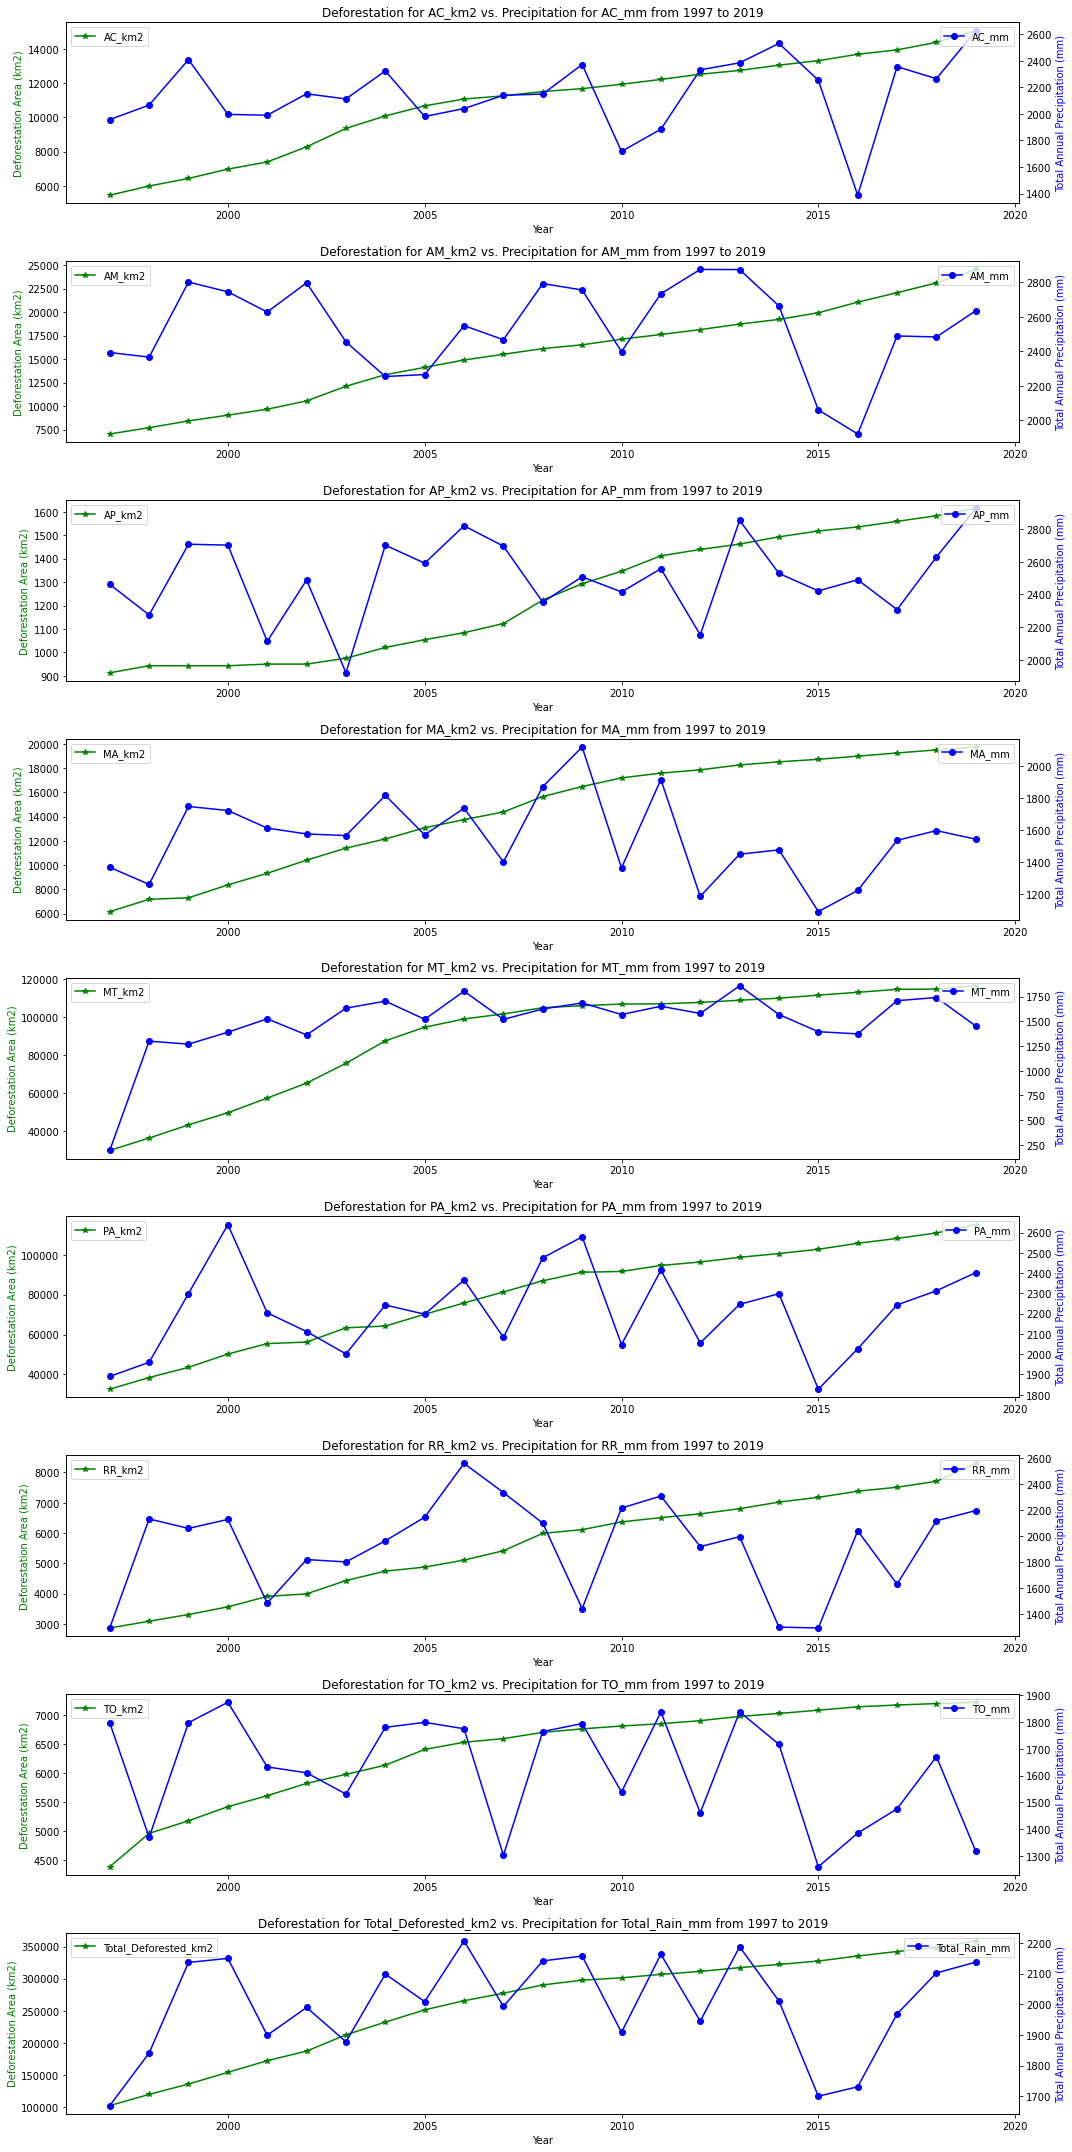

In [29]:
#plots deforestation data summed up over the years of 1997 to 2019. also plotted is the yearly total precipitation over the years
multilineplot(sum_deforest_97,tot_rain_97)

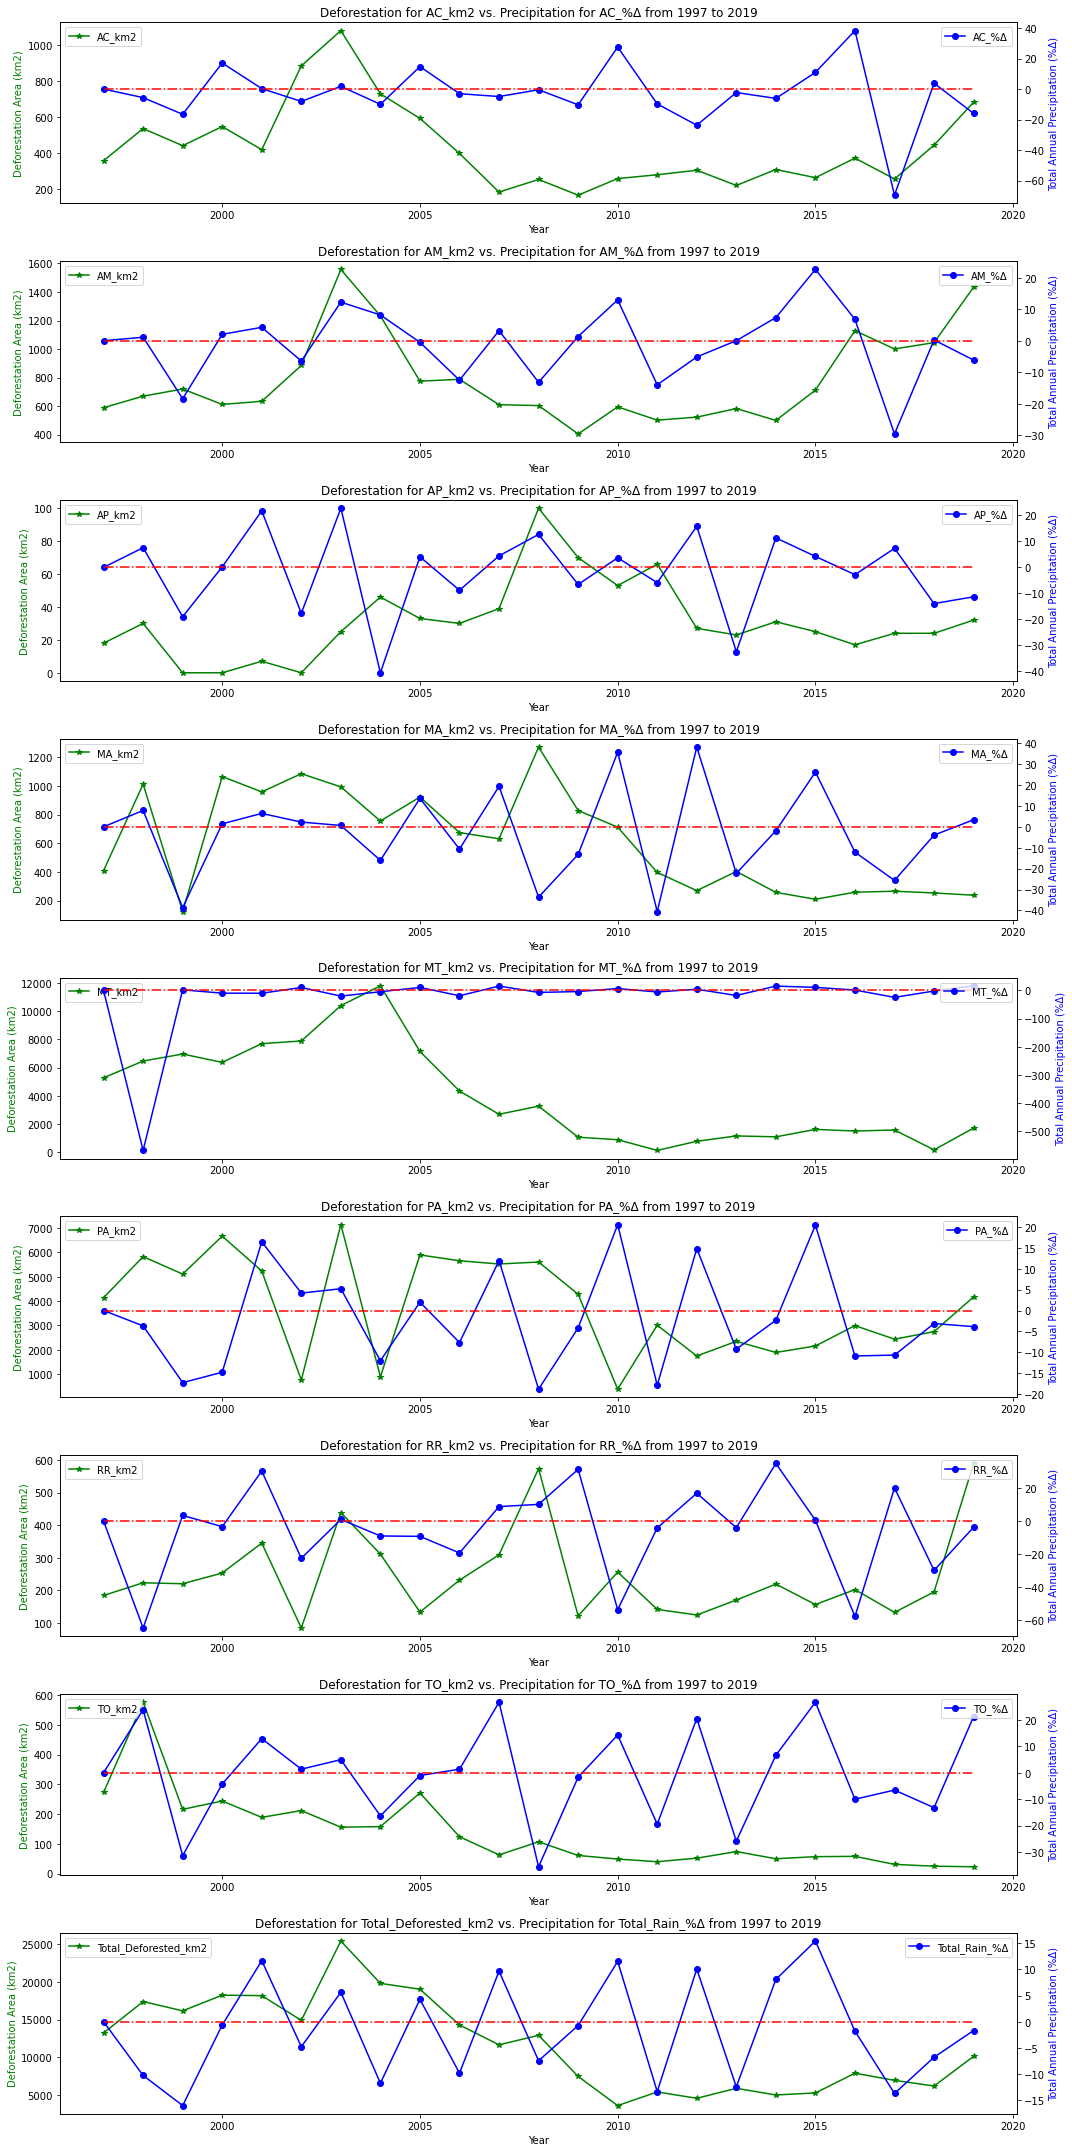

In [30]:
#plots deforestation data summed up over the years of 1997 to 2019. also plotted is the yearly total precipitation
multilineplot(deforest_per_year_97,pct_chng_rain_97,False)

In [31]:
#multilineplot(sum_deforest_88,tot_rain_88)

In [32]:
#multilineplot(sum_deforest_88,pct_chng_rain_88)

In [33]:
#multilineplot(deforest_per_year_88,tot_rain_88,False)

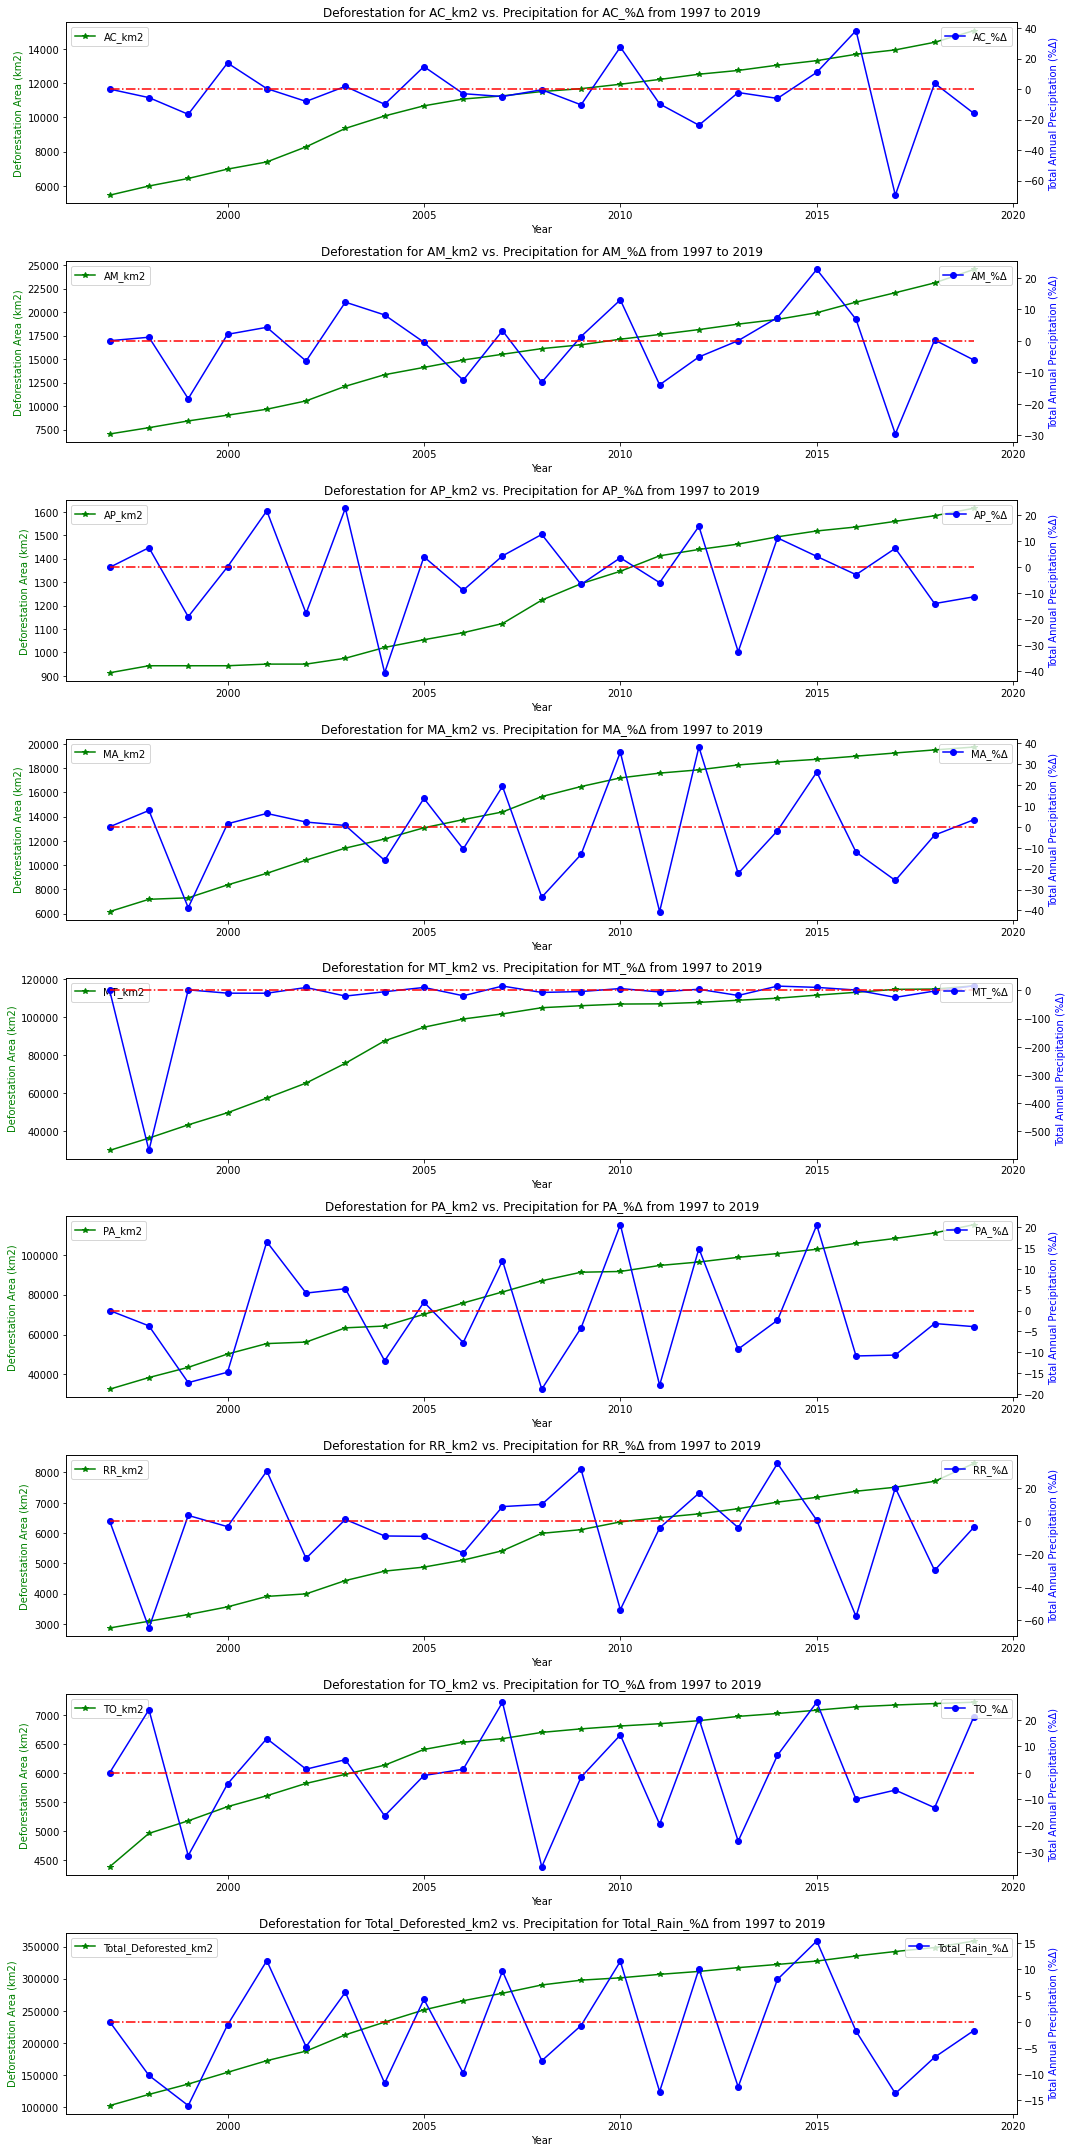

In [34]:
multilineplot(sum_deforest_97,pct_chng_rain_97,False)

In [35]:
#multilineplot(deforest_per_year_88,pct_chng_rain_88,False)